In [1]:
import pandas as pd
import numpy as np²

In [2]:
df=pd.read_csv('measures_v2.csv.zip')

In [3]:
df.head(2)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.08667,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.09239,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17


In [4]:
df.info( memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [5]:
len(df.profile_id.unique())

69

# Investigation

### Power

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><msub><mi>P</mi><mi>e</mi></msub><mo>=</mo><msub><mi>U</mi><mi>d</mi></msub><msub><mi>I</mi><mi>d</mi></msub><mo>+</mo><msub><mi>U</mi><mi>q</mi></msub><msub><mi>I</mi><mi>q</mi></msub></mrow><annotation encoding="application/x-tex">P_e = U_d I_d + U_q I_q
</annotation></semantics></math>

In [6]:
df2=df.copy()

In [42]:
df2['Pe']=(df2.u_q*df2.i_q+df2.u_d*df2.i_d)*3/2

In [43]:
df2['Pm']=df2.torque*(2*np.pi*df2.motor_speed/60)

In [44]:
a=df2[['Pe','Pm']].iloc[1000:2000]
a['rend']=a.Pm/a.Pe
a

,Pe,Pm,rend
1000,26933.490008,25299.109689,0.939318
1001,26938.870609,25315.512324,0.939739
1002,26967.826872,25343.812912,0.939780
1003,26955.650880,25379.170049,0.941516
1004,26997.579713,25390.830321,0.940485
...,...,...,...
1995,26967.235203,25475.081944,0.944668
1996,26960.549965,25435.845418,0.943447
1997,26947.988168,25394.377477,0.942348
1998,26949.310682,25347.626507,0.940567


In [47]:
t='''u_q
Voltage q-component measurement in dq-coordinates (in V)

coolant
Coolant temperature (in °C)

stator_winding
Stator winding temperature (in °C) measured with thermocouples

u_d
Voltage d-component measurement in dq-coordinates

stator_tooth
Stator tooth temperature (in °C) measured with thermocouples

motor_speed
Motor speed (in rpm)

i_d
Current d-component measurement in dq-coordinates

i_q
Current q-component measurement in dq-coordinates

pm
Permanent magnet temperature (in °C) measured with thermocouples and transmitted wirelessly via a thermography unit.

stator_yoke
Stator yoke temperature (in °C) measured with thermocouples'''.split('\n\n')
t=[x.split('\n') for x in t]
dic={x[0]:x[1] for x in t}
print(df.columns)
dic

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')


{'u_q': 'Voltage q-component measurement in dq-coordinates (in V)',
 'coolant': 'Coolant temperature (in °C)',
 'stator_winding': 'Stator winding temperature (in °C) measured with thermocouples',
 'u_d': 'Voltage d-component measurement in dq-coordinates',
 'stator_tooth': 'Stator tooth temperature (in °C) measured with thermocouples',
 'motor_speed': 'Motor speed (in rpm)',
 'i_d': 'Current d-component measurement in dq-coordinates',
 'i_q': 'Current q-component measurement in dq-coordinates',
 'pm': 'Permanent magnet temperature (in °C) measured with thermocouples and transmitted wirelessly via a thermography unit.',
 'stator_yoke': 'Stator yoke temperature (in °C) measured with thermocouples'}

In [48]:
df.shape

(1330816, 13)

In [49]:
len(t)

10

In [50]:
set(df.columns)-set(dic.keys())

{'ambient', 'profile_id', 'torque'}

In [51]:
import matplotlib.pylab as plt

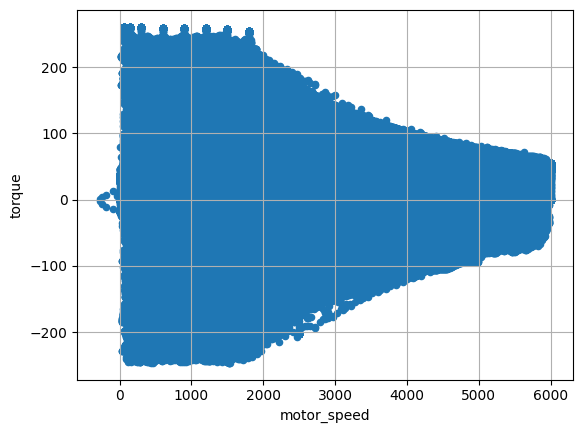

In [52]:
df2.plot.scatter(x= 'motor_speed',y='torque')
plt.grid()

<AxesSubplot:xlabel='motor_speed', ylabel='Pe'>

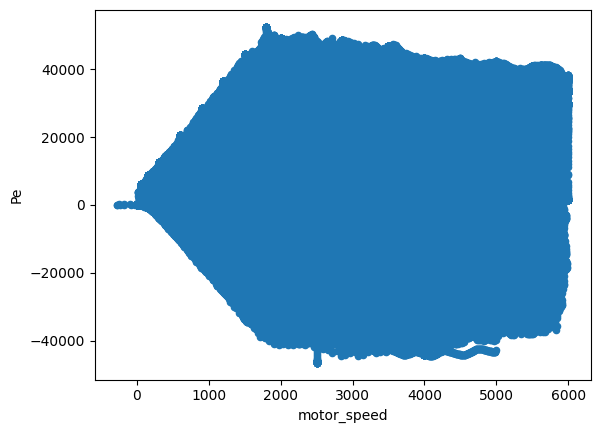

In [53]:
df2.plot.scatter(x= 'motor_speed',y='Pe')

<AxesSubplot:xlabel='motor_speed', ylabel='Pm'>

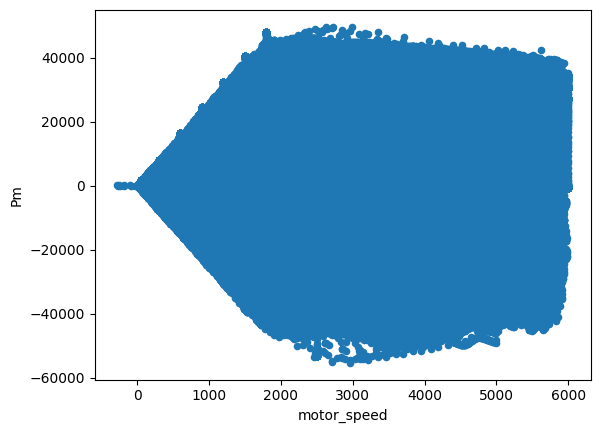

In [54]:
df2.plot.scatter(x= 'motor_speed',y='Pm')

In [55]:
from matplotlib.pyplot import figure



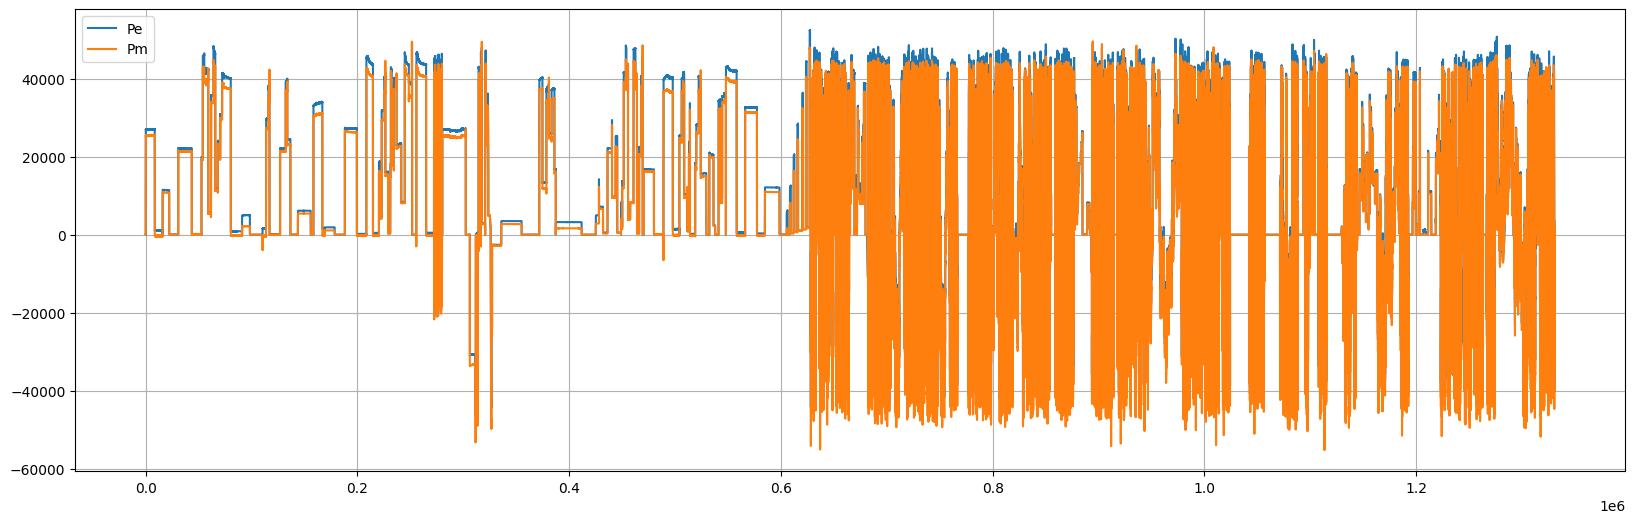

In [56]:
figure(figsize=(20, 6))
plt.plot(df2.Pe,label='Pe')
plt.plot(df2.Pm,label='Pm')
plt.legend()
plt.grid()

C:\Users\a037702\AppData\Local\Temp\ipykernel_22332\2989897564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Pe']=df2['Pe']#/2
C:\Users\a037702\AppData\Local\Temp\ipykernel_22332\2989897564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Pe_2']=a.Pm/rend


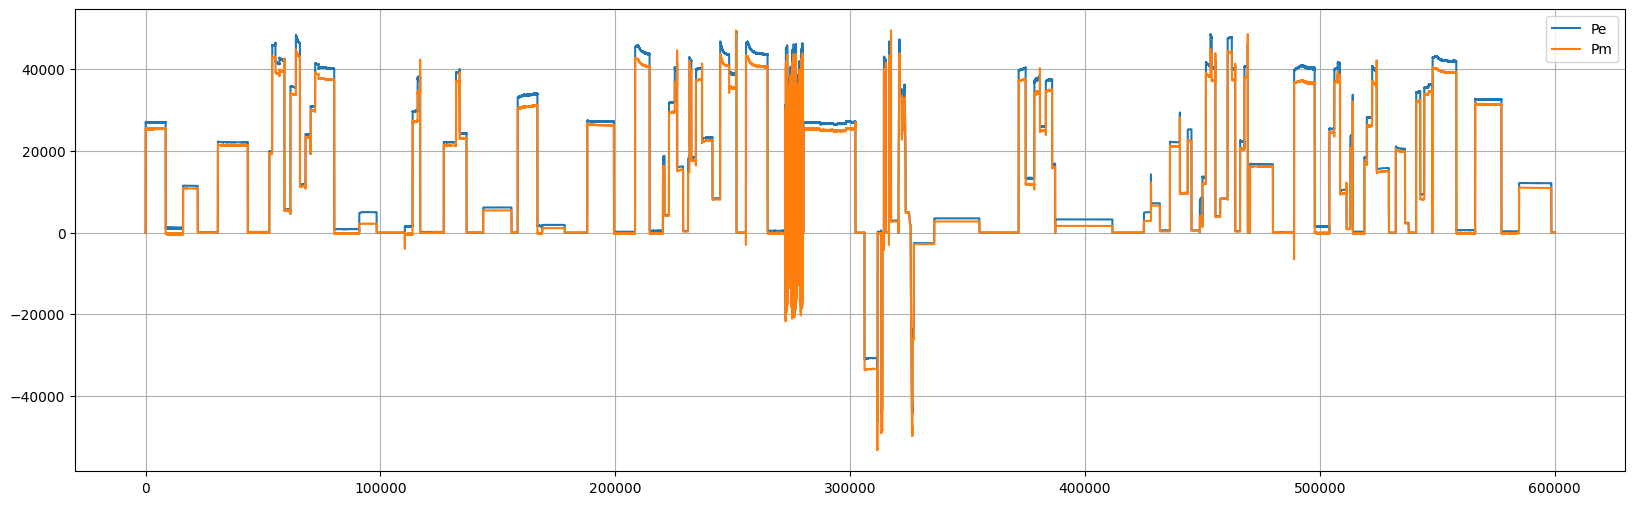

In [57]:
figure(figsize=(20, 6))
a=df2[['Pm']]
a['Pe']=df2['Pe']#/2
rend=0.92
a['Pe_2']=a.Pm/rend
a=a.iloc[:int(6e5),:]
plt.plot(a.Pe,label='Pe')
#plt.plot(a.Pe_2,label='Pe_2')
plt.plot(a.Pm,label='Pm')
plt.legend()
plt.grid()

In [58]:
a.iloc[1000:2000]

,Pm,Pe,Pe_2
1000,25299.109689,26933.490008,27499.032270
1001,25315.512324,26938.870609,27516.861222
1002,25343.812912,26967.826872,27547.622731
1003,25379.170049,26955.650880,27586.054401
1004,25390.830321,26997.579713,27598.728609
...,...,...,...
1995,25475.081944,26967.235203,27690.306461
1996,25435.845418,26960.549965,27647.658063
1997,25394.377477,26947.988168,27602.584214
1998,25347.626507,26949.310682,27551.767942


(0.5, 1.0)

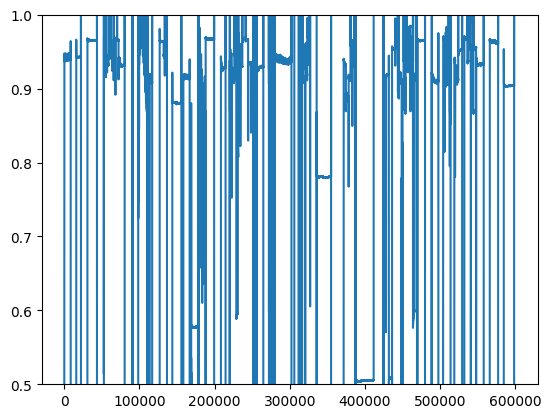

In [59]:
n=int(1e4)
a['eff']=a.Pm/a.Pe
a.eff.plot()
plt.ylim([0.5,1])

In [60]:
df2

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id,Pe,Pm
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01,17,-0.002542,5.614550e-05
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01,17,0.000106,6.599304e-06
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01,17,-0.000976,4.355547e-05
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01,17,-0.001016,1.523419e-04
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01,17,0.005777,6.830275e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71,-5.918633,-3.228829e-64
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71,-6.055876,-1.817849e-63
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71,-5.924929,-1.004052e-63
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71,-6.018793,-1.770500e-63


In [61]:
import seaborn as sns

In [63]:
cor=df2.corr()

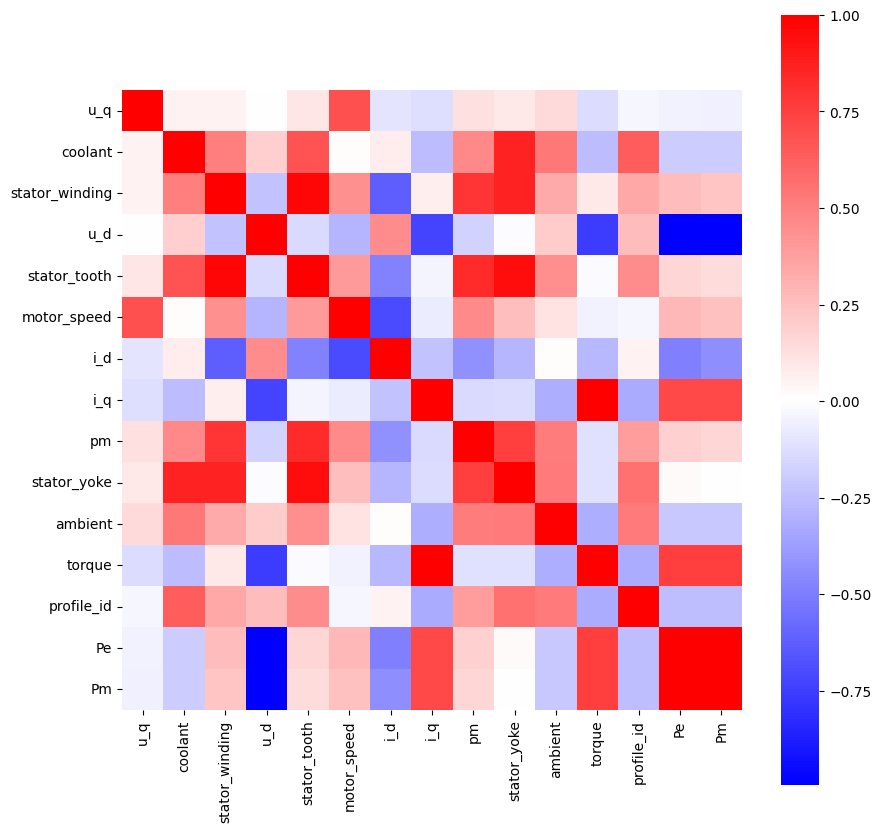

In [64]:


mask = np.triu(np.ones_like(cor))# this mask allow us to print a half of rectangle

plt.figure(figsize=(10,10))
sns.heatmap(data=cor,square=True,cmap='bwr')#, mask=mask)#
plt.yticks(rotation=0)
plt.xticks(rotation=90)
pass # this is used just to not print the name of the plot

In [67]:
df2.profile_id.value_counts()

profile_id
20    43971
6     40388
65    40094
18    37732
66    36476
      ...  
51     6261
64     6250
52     3726
46     2180
47     2176
Name: count, Length: 69, dtype: int64

## Avoid data leakage

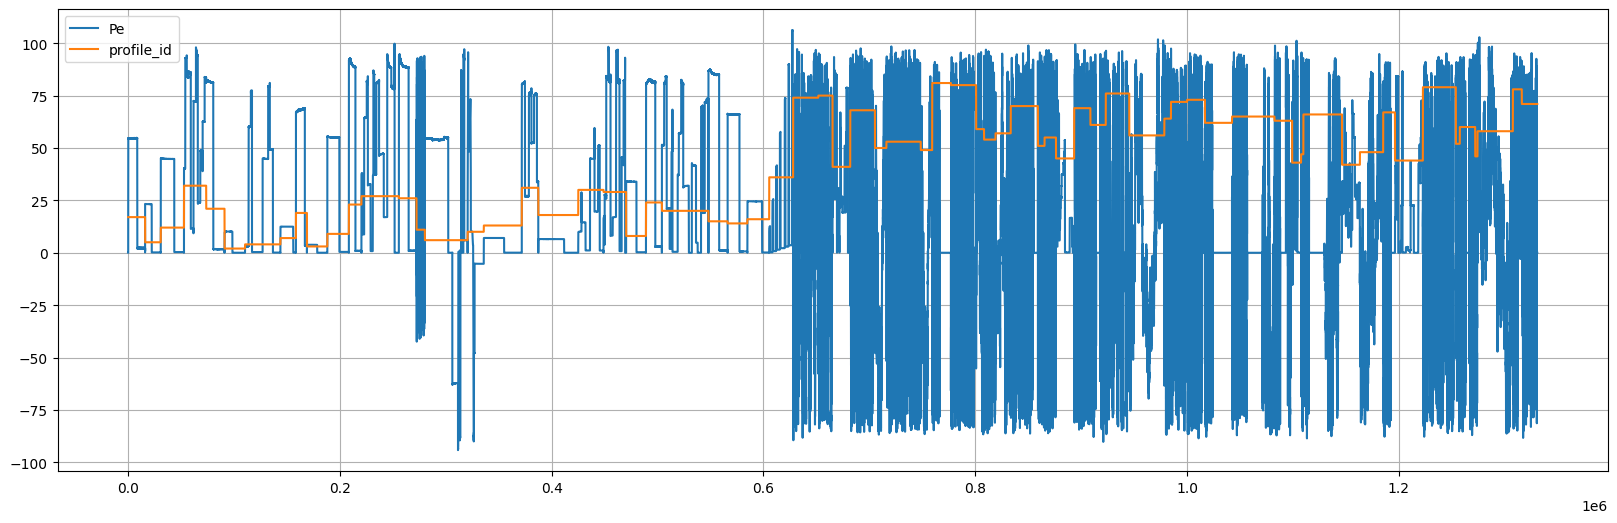

In [71]:
figure(figsize=(20, 6))
plt.plot(df2.profile_id.max()*df2.Pe/4e4,label='Pe')
plt.plot(df2.profile_id,label='profile_id')

plt.legend()
plt.grid()

In [76]:
df2.profile_id.iloc[int(6e5):].unique()

array([16, 36, 74, 75, 41, 68, 50, 53, 49, 81, 80, 59, 54, 57, 70, 51, 55,
       45, 69, 61, 76, 56, 64, 72, 73, 62, 65, 63, 43, 47, 66, 42, 48, 67,
       44, 79, 52, 60, 46, 58, 78, 71], dtype=int64)

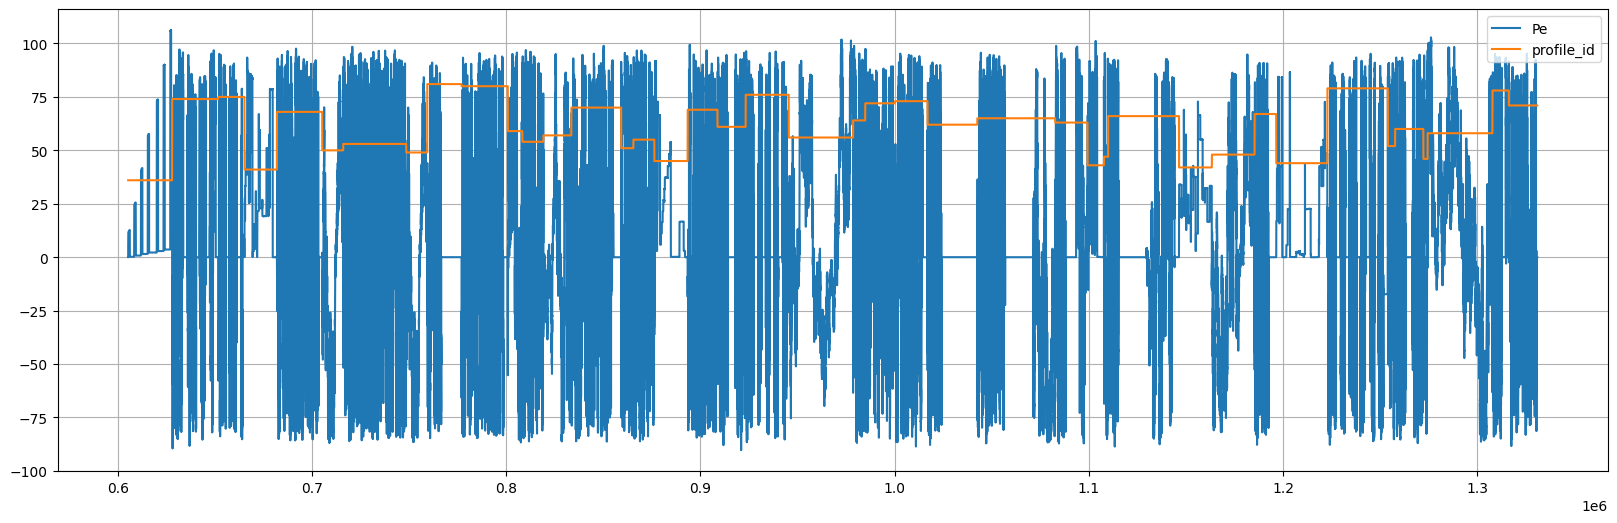

In [79]:
figure(figsize=(20, 6))
plt.plot(df2.profile_id.max()*df2[df2.profile_id>=36].Pe/4e4,label='Pe')
plt.plot(df2[df2.profile_id>=36].profile_id,label='profile_id')

plt.legend()
plt.grid()

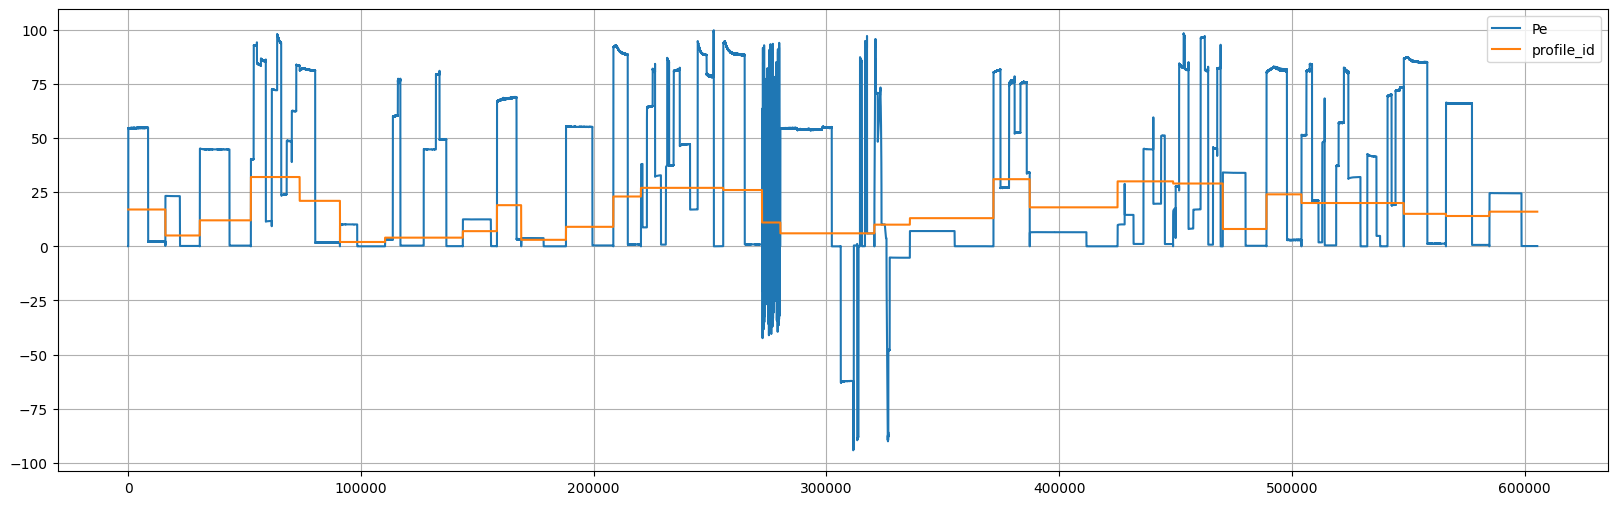

In [80]:
figure(figsize=(20, 6))
plt.plot(df2.profile_id.max()*df2[df2.profile_id<36].Pe/4e4,label='Pe')
plt.plot(df2[df2.profile_id<36].profile_id,label='profile_id')

plt.legend()
plt.grid()

In [146]:
def split_with_groupes(df,groups_col, test_size=0.2,seed=0,n_ether=10): #with non-overlapping groups
    groups=df[groups_col].unique().tolist()
    np.random.seed(seed) 
    
    arr=[]
    for i in range(n_ether):
        np.random.shuffle(groups)
        i_test=int(len(groups)*(1-test_size))
        groups_train=groups[:i_test]  
        groups_test=groups[i_test:]
        df_train=df[df[groups_col].isin(groups_train)]
        df_test=df[df[groups_col].isin(groups_test)]
        arr.append([df_train,df_test])
    arr_results=[]
    for elem in arr: 
        df_train,df_test=elem
        arr_results.append(len(df_test)/len(df))
    
    print(arr_results)
    arr_results=np.abs(np.array(arr_results) -test_size)
    i_min=np.argmin(arr_results)
    df_train,df_test=arr[i_min]
    return df_train,df_test
        
        



In [154]:
df_train,df_test=split_with_groupes(df=df2,groups_col='profile_id',test_size=0.2,seed=0,n_ether=10)

[0.22502660022121765, 0.17643310570356835, 0.23252049870154853, 0.2162034420986823, 0.20844053573146099, 0.200810630470328, 0.22086900067327114, 0.20227890256804848, 0.21073010844474369, 0.19175603539482544]


In [155]:
len(df_test)/len(df2),len(df_train)/len(df2)

(0.200810630470328, 0.799189369529672)

In [156]:
df_train2=df_train.reset_index(drop=True)
df_test2=df_test.reset_index(drop=True)

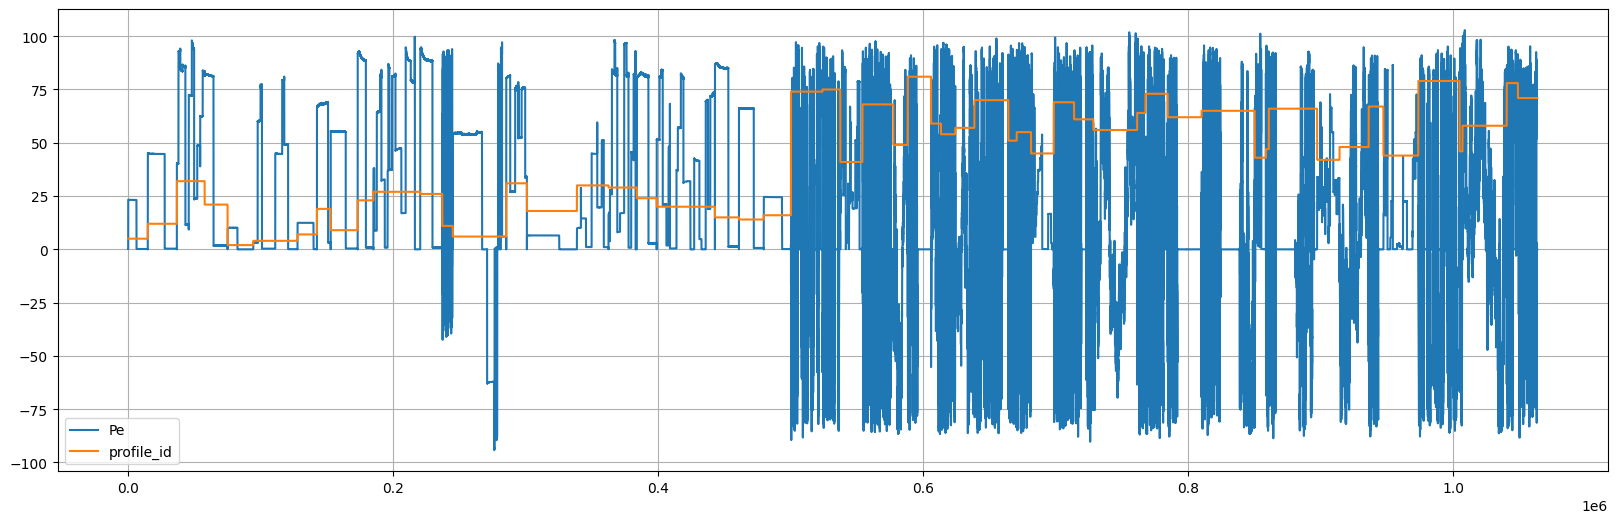

In [157]:
figure(figsize=(20, 6))
plt.plot(df_train2.profile_id.max()*df_train2.Pe/4e4,label='Pe')
plt.plot(df_train2.profile_id,label='profile_id')

plt.legend()
plt.grid()

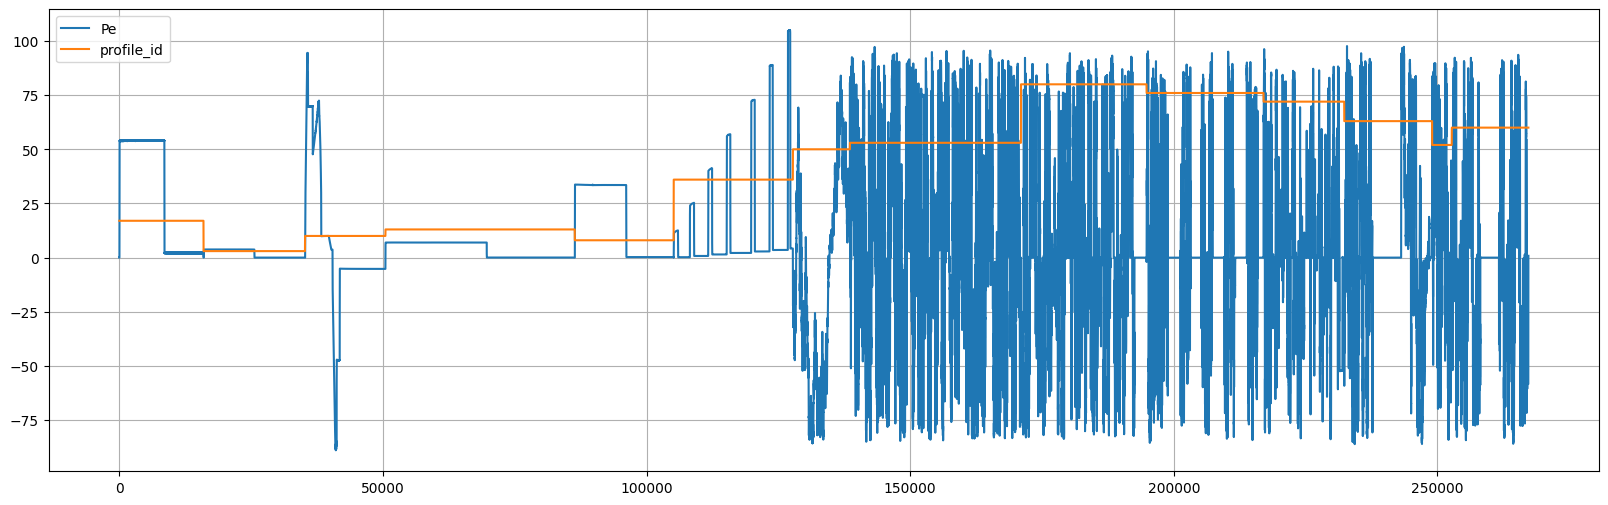

In [158]:
figure(figsize=(20, 6))
plt.plot(df_test2.profile_id.max()*df_test2.Pe/4e4,label='Pe')
plt.plot(df_test2.profile_id,label='profile_id')

plt.legend()
plt.grid()

In [165]:
X_train=df_train[['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'stator_yoke', 'ambient', 'torque',
       'profile_id', 'Pe','Pm']]
y_train=df_train[ 'pm' ]

In [164]:
X_test=df_test[['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'stator_yoke', 'ambient', 'torque',
       'profile_id', 'Pe','Pm']]
y_test=df_test[ 'pm' ]

In [167]:
 from sklearn.linear_model import LinearRegression

In [168]:
reg = LinearRegression().fit(X_train, y_train)

In [169]:
reg.score(X_train, y_train)

0.8502196433648224

In [170]:
reg.score(X_test, y_test)

0.8438169846170307

In [171]:
yh_train=reg.predict(X_train)

In [172]:
yh_test=reg.predict(X_test)

In [173]:
from sklearn.metrics import r2_score as R2

In [174]:
R2(yh_test,y_test)

0.8236359559074508

In [175]:
R2(yh_train,y_train)

0.8238333378862005

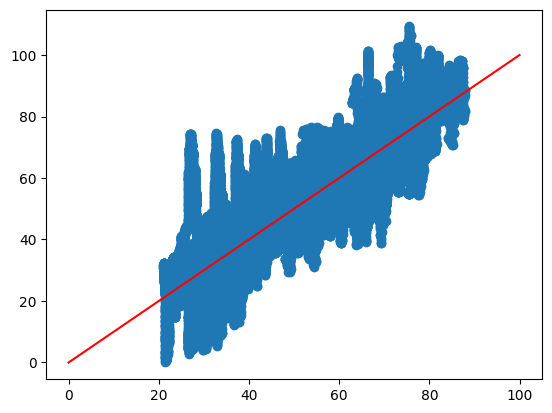

In [178]:
plt.scatter(y_test,yh_test)
plt.plot([0,100],[0,100],c='r')

In [194]:
hist=(y_test-yh_test).astype(int).value_counts()
hist

pm
 0     31939
-5     23626
-6     19476
-1     19109
-2     15231
       ...  
 26        6
 27        6
 30        2
 28        1
 29        1
Name: count, Length: 78, dtype: int64

In [195]:
hist=hist.sort_index()

<AxesSubplot:xlabel='pm'>

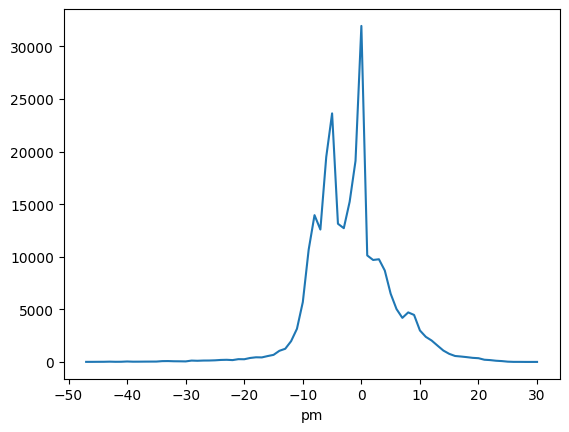

In [193]:
hist.plot()